# import library

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [13]:
import re
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostClassifier

import gdown

#import warnings
#warnings.filterwarnings(action='ignore')

# load data

In [3]:
!git clone https://github.com/jeongminia/Cancer-Classification.git
!unzip -qq '/content/Cancer-Classification/data/open.zip'
!unzip -qq '/content/Cancer-Classification/data/preprocessed_data.zip'

Cloning into 'Cancer-Classification'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 184 (delta 80), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (184/184), 12.82 MiB | 5.44 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [4]:
# 공유 링크에서 ID 추출
url = f"https://drive.google.com/uc?id=1TP-l24eJn_oZVlOG8KLQHkK4W0wRUqKV"

# 파일 다운로드
output = 'preprocessed_trainv2.csv'
gdown.download(url, output, quiet=False)

# 데이터프레임으로 읽기
train = pd.read_csv(output)

# 공유 링크에서 ID 추출
url = f"https://drive.google.com/uc?id=1-RkNKFSRLFVG0LawcfEMTv1t-zIhoOZJ"

# 파일 다운로드
output = 'preprocessed_trainv2.csv'
gdown.download(url, output, quiet=False)

# 데이터프레임으로 읽기
test = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1TP-l24eJn_oZVlOG8KLQHkK4W0wRUqKV
To: /content/preprocessed_trainv2.csv
100%|██████████| 54.3M/54.3M [00:01<00:00, 53.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-RkNKFSRLFVG0LawcfEMTv1t-zIhoOZJ
To: /content/preprocessed_trainv2.csv
100%|██████████| 22.3M/22.3M [00:00<00:00, 68.9MB/s]


In [5]:
#train = pd.read_csv('/content/preprocessed_train.csv')
#test = pd.read_csv('/content/preprocessed_test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [6]:
print(train)
print(test)

              ID SUBCLASS  A2M  AAAS  AADAT  AARS1  ABAT  ABCA1  ABCA2  ABCA3  \
0     TRAIN_0000    KIPAN    0     0      0      0     0      0      0      0   
1     TRAIN_0001     SARC    0     0      0      0     0      0      0      0   
2     TRAIN_0002     SKCM    0     0      0      0     0      0      0      0   
3     TRAIN_0003     KIRC    0     0      0      0     0      0      0      0   
4     TRAIN_0004   GBMLGG    0     0      0      0     0      0      0      0   
...          ...      ...  ...   ...    ...    ...   ...    ...    ...    ...   
6196  TRAIN_6196     LUAD    0     0      0      0     0      0      0      0   
6197  TRAIN_6197      LGG    0     0      0      0     0      0      0      0   
6198  TRAIN_6198     COAD    0     0      0      0     0      0      0      0   
6199  TRAIN_6199     TGCT    0     0      0      0     0      0      0      0   
6200  TRAIN_6200     SKCM    0     0      0      0     0      0      0      0   

      ...  ZNF292  ZNF365  

# split data

In [7]:
X = train.drop(columns=['SUBCLASS', 'ID'])
y = train['SUBCLASS']

In [8]:
X

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y

,SUBCLASS
0,KIPAN
1,SARC
2,SKCM
3,KIRC
4,GBMLGG
...,...
6196,LUAD
6197,LGG
6198,COAD
6199,TGCT


In [10]:
# 범주형 변수를 찾기
cat_features_indices = X.select_dtypes(include=['object']).columns

# 범주형 변수의 인덱스 찾기
cat_feature_indices = [X.columns.get_loc(col) for col in cat_features_indices]

print("범주형 변수 인덱스:", cat_feature_indices)

범주형 변수 인덱스: []


In [11]:
# 데이터 분할 (각 클래스 비율 유지)
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # 각 클래스 비율 유지
)

# train model

In [12]:
# 필요한 라이브러리 임포트
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Pool 객체 생성 (카테고리형 변수 지정)
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_val, y_val)

params = {'learning_rate': 0.8, 'depth': 10,
          'boosting_type': 'Plain',
          'iterations': 5000,
          'task_type': 'GPU',
          'max_bin': 20000
          }

model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=1000, use_best_model=True)

print("Training session is done! *^^*")

0:	learn: 2.6161428	test: 2.7426892	best: 2.7426892 (0)	total: 504ms	remaining: 41m 58s
1:	learn: 2.7727027	test: 2.9478143	best: 2.7426892 (0)	total: 871ms	remaining: 36m 17s
2:	learn: 3.1057960	test: 3.3984206	best: 2.7426892 (0)	total: 1.32s	remaining: 36m 42s
3:	learn: 2.7206427	test: 3.0536134	best: 2.7426892 (0)	total: 1.62s	remaining: 33m 40s
4:	learn: 2.5383305	test: 2.8394542	best: 2.7426892 (0)	total: 1.95s	remaining: 32m 32s
5:	learn: 2.4941318	test: 2.8024385	best: 2.7426892 (0)	total: 2.18s	remaining: 30m 14s
6:	learn: 2.4413718	test: 2.7809356	best: 2.7426892 (0)	total: 2.63s	remaining: 31m 18s
7:	learn: 2.3438536	test: 2.6957583	best: 2.6957583 (7)	total: 3.02s	remaining: 31m 25s
8:	learn: 2.2827093	test: 2.6209995	best: 2.6209995 (8)	total: 3.27s	remaining: 30m 13s
9:	learn: 2.2276029	test: 2.5906008	best: 2.5906008 (9)	total: 3.63s	remaining: 30m 10s
10:	learn: 2.1942182	test: 2.5684034	best: 2.5684034 (10)	total: 3.81s	remaining: 28m 49s
11:	learn: 2.1576243	test: 2.5

# evaluate model

In [14]:
y_pred = model.predict(X_val)

# 결과 평가
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.35
Classification Report:
               precision    recall  f1-score   support

         ACC       0.78      0.50      0.61        14
        BLCA       0.00      0.00      0.00        21
        BRCA       0.32      0.64      0.42       157
        CESC       0.26      0.16      0.20        31
        COAD       0.66      0.47      0.55        45
        DLBC       0.00      0.00      0.00         7
      GBMLGG       0.39      0.36      0.38        92
        HNSC       0.48      0.29      0.36        45
       KIPAN       0.22      0.30      0.26       103
        KIRC       0.25      0.22      0.24        67
        LAML       0.76      0.41      0.53        32
         LGG       0.31      0.28      0.30        46
        LIHC       0.43      0.32      0.37        31
        LUAD       0.19      0.11      0.14        37
        LUSC       0.41      0.36      0.38        36
          OV       0.20      0.39      0.27        51
        PAAD       0.20      0.04      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1200x800 with 0 Axes>

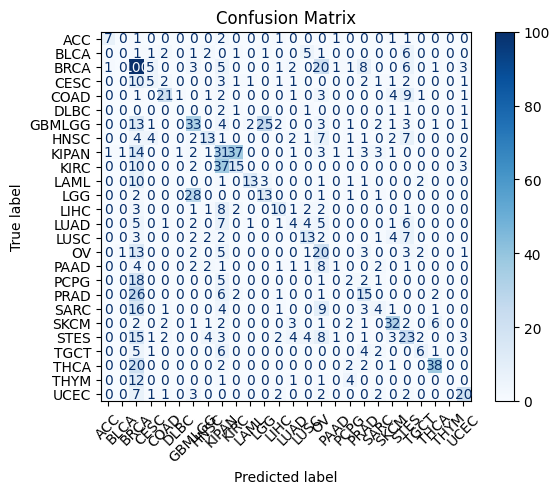

In [15]:
# confusion matrix 계산
cm = confusion_matrix(y_val, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(12, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_val))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.show()

# Predict SUBCLASS

In [16]:
X_test = test.drop(columns=['ID'])

# 예측 수행
predictions = model.predict(X_test)

In [17]:
print("predictions의 길이:", len(predictions))
print("submisson의 길이:", len(submission))

predictions의 길이: 2546
submisson의 길이: 2546


In [18]:
predictions = predictions.ravel()  # 또는 predictions.flatten()
submission["SUBCLASS"] = predictions

In [19]:
submission.to_csv('submission.csv', encoding='UTF-8-sig', index=False)